<h1><center>Evaluation Project</center></h1>

UMass Chan Medical School

Weng Lab

Natalie Haas

First and foremost, the following libraries and tools must be imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import math
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import re

A pandas tool is used to read in the dataset from the webpage provided.

In [2]:
df2 = pd.read_table("http://users.wenglab.org/moorej3/Yu-Project/Mouse-Enhancer-Matrix.txt")

In [3]:
df2

,ccres,C57BL/6_embryonic_facial_prominence_embryo_11.5_days,C57BL/6_embryonic_facial_prominence_embryo_12.5_days,C57BL/6_embryonic_facial_prominence_embryo_13.5_days,C57BL/6_embryonic_facial_prominence_embryo_14.5_days,C57BL/6_embryonic_facial_prominence_embryo_15.5_days,C57BL/6_forebrain_embryo_11.5_days,C57BL/6_forebrain_embryo_12.5_days,C57BL/6_forebrain_embryo_13.5_days,C57BL/6_forebrain_embryo_14.5_days,...,C57BL/6_midbrain_postnatal_0_days,C57BL/6_neural_tube_embryo_11.5_days,C57BL/6_neural_tube_embryo_12.5_days,C57BL/6_neural_tube_embryo_13.5_days,C57BL/6_neural_tube_embryo_14.5_days,C57BL/6_neural_tube_embryo_15.5_days,C57BL/6_stomach_embryo_14.5_days,C57BL/6_stomach_embryo_15.5_days,C57BL/6_stomach_embryo_16.5_days,C57BL/6_stomach_postnatal_0_days
0,EM10D0024807,0.737987,0.496333,0.394944,0.608239,0.519169,0.476346,0.469204,0.728918,0.526971,...,0.651397,0.531423,0.782652,0.606512,0.465679,0.559411,0.489681,0.728980,1.047850,1.142360
1,EM10D0062280,0.737908,0.756066,0.619545,0.840945,0.786815,1.235750,1.365740,1.077090,0.811603,...,0.935929,1.176740,1.049060,0.934667,1.252420,1.090870,0.949902,0.745198,0.767133,0.862137
2,EM10D0073850,0.366271,0.901060,0.695672,0.345374,0.596921,1.018470,1.055840,0.776323,0.829389,...,0.645772,0.855515,0.890337,0.610279,0.783446,0.673417,0.752583,0.868450,0.685157,0.370126
3,EM10D0135775,0.531865,0.987585,0.451908,0.425011,0.790187,0.462021,0.838769,0.646874,0.505505,...,0.386949,0.759358,0.795779,0.583168,0.539668,0.575424,0.840946,0.597951,0.750593,1.036590
4,EM10D0156272,1.275800,1.399650,1.563410,1.546810,1.135640,1.296100,1.475620,1.383600,1.491620,...,1.653730,1.861350,0.979202,1.484450,1.591600,1.638390,1.287630,1.074740,1.104080,1.201430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209035,EM10D2262191,0.832552,0.975463,0.845471,1.412510,1.067880,1.494180,1.650460,1.402780,1.261750,...,0.862431,0.991856,0.891767,1.587430,1.243900,1.353740,1.026690,1.098800,1.250270,0.636807
209036,EM10D2262192,0.758047,1.039910,0.851552,1.272120,1.039310,1.190560,1.520350,1.294210,1.016080,...,0.845303,0.822021,1.007000,1.481420,1.290480,1.249030,1.007790,1.110660,1.247090,0.647085
209037,EM10D2262193,0.540201,0.846094,0.677188,0.972213,0.747629,0.804412,1.137400,0.961928,0.751759,...,0.710634,0.594209,0.761183,1.127630,0.987441,0.847843,0.754032,0.825794,1.006760,0.506143
209038,EM10D2262225,0.867886,0.425700,0.529801,0.686463,0.456390,0.381875,0.742022,0.300008,0.306066,...,0.177244,0.339435,0.285803,0.503609,0.481451,0.593258,0.721343,0.951221,0.879753,0.728717


In [4]:
sample_names = df2.columns[1:]
matrix_values = df2.iloc[:,1:].values

In [5]:
df2_trans = np.log1p(matrix_values) #transforming

In [6]:
df2_trans

array([[0.55272755, 0.40301745, 0.33285427, ..., 0.54753164, 0.71679046,
        0.76190803],
       [0.55268209, 0.56307608, 0.48214525, ..., 0.55686802, 0.56935846,
        0.62172475],
       [0.31208513, 0.64241163, 0.52807912, ..., 0.62510921, 0.52185873,
        0.31490271],
       ...,
       [0.43191293, 0.61307206, 0.51711858, ..., 0.60201496, 0.69652148,
        0.40955208],
       [0.62480731, 0.35466292, 0.42513766, ..., 0.66845533, 0.63114039,
        0.54737951],
       [0.64476071, 0.5084921 , 0.6935521 , ..., 0.6315696 , 0.34591678,
        0.15607511]])

In [7]:
from sklearn.preprocessing import StandardScaler

matrix_values_normalized = StandardScaler().fit_transform(df2_trans) #normalizing data

In [8]:
matrix_values_normalized

array([[-0.58384998, -1.19020711, -1.2243021 , ..., -0.78023766,
        -0.29407257, -0.2023557 ],
       [-0.58398831, -0.72343218, -0.86952393, ..., -0.75420097,
        -0.61815686, -0.55228699],
       [-1.31619092, -0.49206794, -0.76036572, ..., -0.56389431,
        -0.72257052, -1.31818888],
       ...,
       [-0.95152204, -0.57763018, -0.78641257, ..., -0.62829807,
        -0.33862774, -1.0819212 ],
       [-0.36449147, -1.3312222 , -1.00499794, ..., -0.44301343,
        -0.48234814, -0.73787065],
       [-0.30376779, -0.88261405, -0.3671323 , ..., -0.54587798,
        -1.10932524, -1.71466089]])

A new dataframe can now be constructed with the transformed, normalized matrix values.

In [9]:
matrix_df = pd.DataFrame(matrix_values_normalized, columns=sample_names)

# PCA

a PCA plot shows correlation between variables, as well as sample clustering.

In [10]:
from sklearn.decomposition import PCA

pca = PCA()

pca_fit = pca.fit(matrix_values_normalized)

PC_values = np.arange(pca.n_components_) + 1

Most of variance can be explained by certain PCs. organizing and plotting all components first should provide how much it should be "cropped" by to find which PCs should be used in the analysis. This can be done using a dataframe and scree plot.

In [11]:
explained_var_ratio_df = pd.DataFrame( {'var_ratio': pca.explained_variance_ratio_, 'PC' : PC_values})

In [12]:
explained_var_ratio_df

,var_ratio,PC
0,0.516484,1
1,0.174129,2
2,0.065923,3
3,0.041529,4
4,0.030656,5
...,...,...
61,0.000610,62
62,0.000590,63
63,0.000587,64
64,0.000495,65


PCs that are more than 5% responsible for variability are the ones that should be used. This happens to be PC1, PC2, and PC3. Let's double check this on a plot!

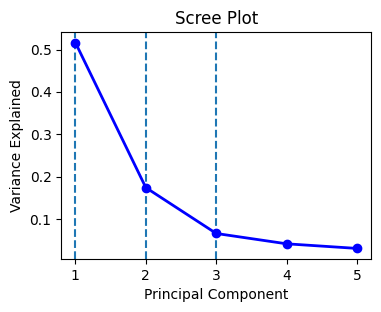

In [13]:
plt.figure(figsize=(4, 3), dpi=100)

PC_values = np.arange(pca.n_components_) + 1
plt.axvline(x=1,linestyle='--')
plt.axvline(x=2,linestyle='--')
plt.axvline(x=3,linestyle='--')
plt.plot(explained_var_ratio_df.loc[0:4, 'PC'], explained_var_ratio_df.loc[0:4, 'var_ratio'], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

After the first 3 PCs, it levels out significantly. PC1, PC2, and PC3 should be used when analyzing and plotting the data.

In [14]:
explained_var_ratio_df.loc[0:2, 'var_ratio'].values

array([0.51648366, 0.17412933, 0.06592322])

The variance can be explained by PC1, PC2 and PC3 approximately 51.6%, 17.4%, and 6.6% respectively. 

now to plot PCA.

In [15]:
n_components_need = 3
pca_res1 = pd.DataFrame(np.transpose(pca_fit.components_[0:n_components_need, :]), columns=["PC" + str(x+1) for x in range(n_components_need)])
pca_res1["full_sample_name"] = sample_names

In [16]:
pca_res1

,PC1,PC2,PC3,full_sample_name
0,0.133143,-0.008107,-0.077927,C57BL/6_embryonic_facial_prominence_embryo_11....
1,0.140654,-0.029207,-0.115974,C57BL/6_embryonic_facial_prominence_embryo_12....
2,0.134074,-0.051284,-0.142014,C57BL/6_embryonic_facial_prominence_embryo_13....
3,0.139046,-0.047830,-0.142234,C57BL/6_embryonic_facial_prominence_embryo_14....
4,0.134803,-0.073337,-0.133369,C57BL/6_embryonic_facial_prominence_embryo_15....
...,...,...,...,...
61,0.141247,0.115110,0.018024,C57BL/6_neural_tube_embryo_15.5_days
62,0.136799,-0.099606,-0.086157,C57BL/6_stomach_embryo_14.5_days
63,0.135055,-0.123839,-0.049768,C57BL/6_stomach_embryo_15.5_days
64,0.129014,-0.127906,-0.059142,C57BL/6_stomach_embryo_16.5_days


In [17]:
# the search tool is used to look at a sample name, sort out the tissue, day, and embryo vs postnatal

def get_tissue_n_days(sample_name):
    m=re.search("L/6_(\S+)_([^_]+)_days", str(sample_name))
    tissue = None
    days = None
    if m:
        tissue = m.group(1)
        days = m.group(2)
    
    tissue_pts = tissue.split("_")
    tissue = "_".join(tissue_pts[0:-1])
    embryo_or_postnatal = tissue_pts[-1]
    
    return tissue, embryo_or_postnatal, days

embryo_n_days_info1 = pca_res1['full_sample_name'].apply(get_tissue_n_days) 

In [18]:
embryo_n_days_info2 = pd.DataFrame(embryo_n_days_info1.tolist(), columns=['tissue', 'embryo_or_postnatal', 'days'])

Now these new columns can be added to a new dataframe!

In [19]:
pca_res2 = pd.concat([pca_res1, embryo_n_days_info2], axis=1)

In [20]:
pca_res2

,PC1,PC2,PC3,full_sample_name,tissue,embryo_or_postnatal,days
0,0.133143,-0.008107,-0.077927,C57BL/6_embryonic_facial_prominence_embryo_11....,embryonic_facial_prominence,embryo,11.5
1,0.140654,-0.029207,-0.115974,C57BL/6_embryonic_facial_prominence_embryo_12....,embryonic_facial_prominence,embryo,12.5
2,0.134074,-0.051284,-0.142014,C57BL/6_embryonic_facial_prominence_embryo_13....,embryonic_facial_prominence,embryo,13.5
3,0.139046,-0.047830,-0.142234,C57BL/6_embryonic_facial_prominence_embryo_14....,embryonic_facial_prominence,embryo,14.5
4,0.134803,-0.073337,-0.133369,C57BL/6_embryonic_facial_prominence_embryo_15....,embryonic_facial_prominence,embryo,15.5
...,...,...,...,...,...,...,...
61,0.141247,0.115110,0.018024,C57BL/6_neural_tube_embryo_15.5_days,neural_tube,embryo,15.5
62,0.136799,-0.099606,-0.086157,C57BL/6_stomach_embryo_14.5_days,stomach,embryo,14.5
63,0.135055,-0.123839,-0.049768,C57BL/6_stomach_embryo_15.5_days,stomach,embryo,15.5
64,0.129014,-0.127906,-0.059142,C57BL/6_stomach_embryo_16.5_days,stomach,embryo,16.5


Seaborn will be used to plot PCA. 

PC1 vs PC2 and PC2 vs PC3 will be plotted.

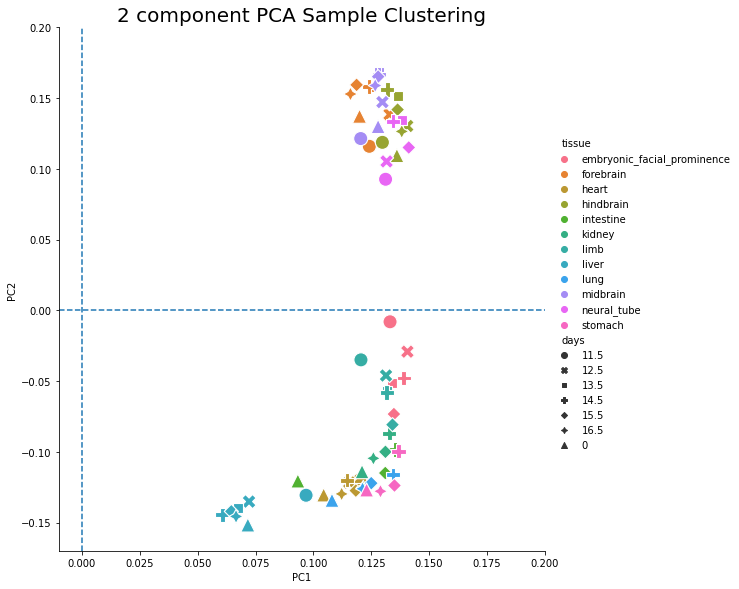

In [21]:
import seaborn as sns

PCA_plot = sns.relplot(data=pca_res2, x='PC1', y='PC2', hue='tissue', style='days', height = 8, s=200)

plt.title('2 component PCA Sample Clustering', y=1, fontsize = 20)
PCA_plot.set(xlim=(-.01,.2),ylim=(-.17,.2))
plt.axhline(y=0,linestyle='--')
plt.axvline(x=0,linestyle='--')

PCA_plot

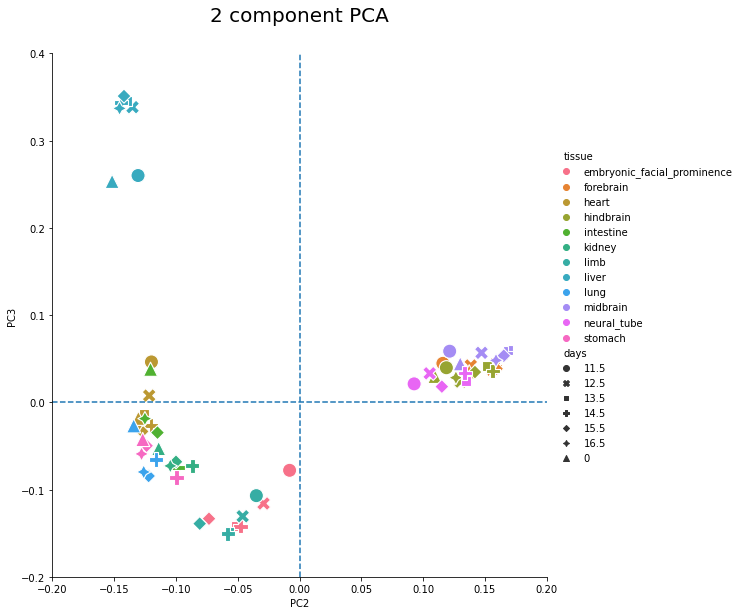

In [80]:
import seaborn as sns

PCA_plot = sns.relplot(data=pca_res2, x='PC2', y='PC3', hue='tissue', style='days', height = 8, s=200)

plt.title('2 component PCA', y=1.05, fontsize = 20)
PCA_plot.set(xlim=(-.2,.2),ylim=(-.2,.4))
plt.axhline(y=0,linestyle='--')
plt.axvline(x=0,linestyle='--')

PCA_plot

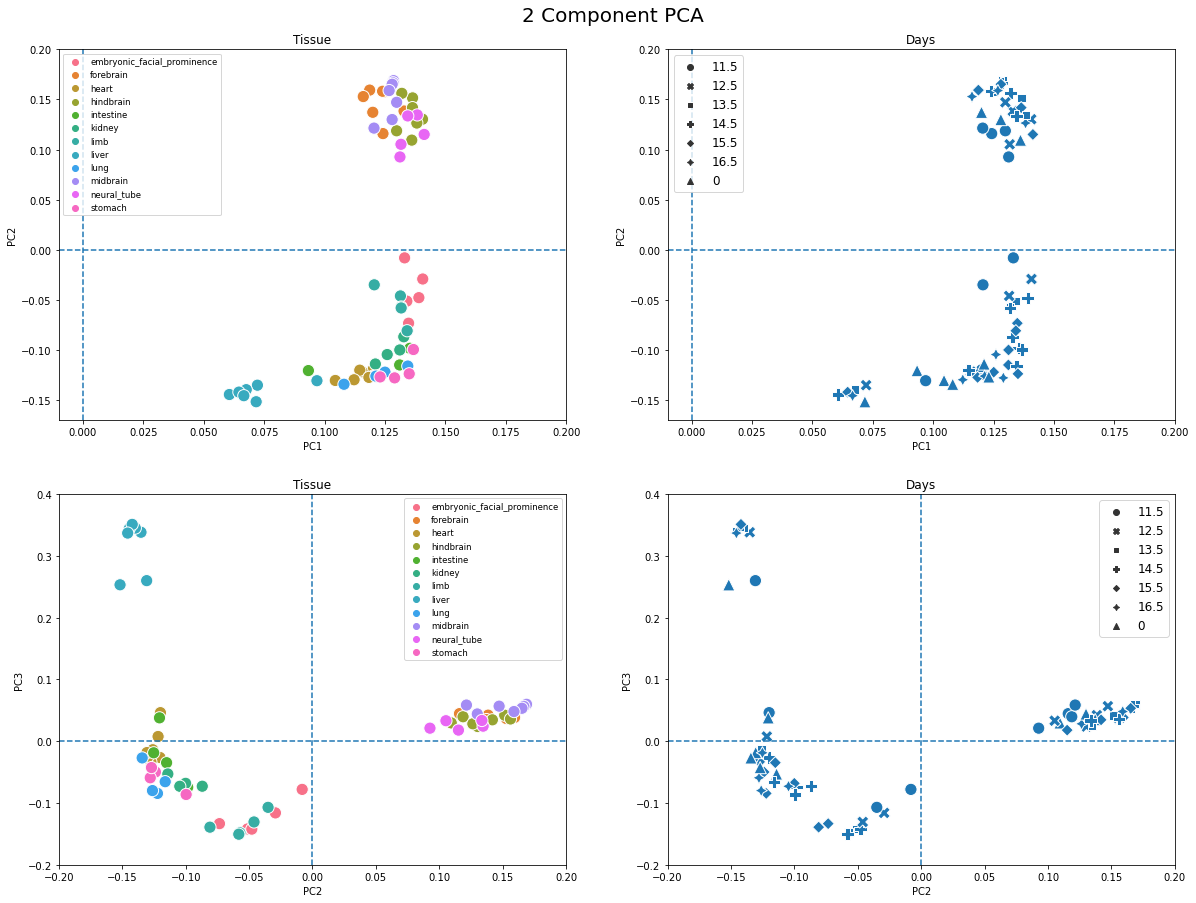

In [39]:
import seaborn as sns

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,15))
fig.suptitle('2 Component PCA', y=.92, x=.51, fontsize = 20)

PCA_plot1 = sns.scatterplot(data=pca_res2, x='PC1', y='PC2', hue='tissue', s=150, ax = ax1)
PCA_plot1.legend(fontsize = 8.5, loc = 'upper left')
PCA_plot1.set(xlim=(-.01,.2),ylim=(-.17,.2))
PCA_plot1.title.set_text('Tissue')
PCA_plot1.axhline(y=0,linestyle='--')
PCA_plot1.axvline(x=0,linestyle='--')

PCA_plot2 = sns.scatterplot(data=pca_res2, x='PC1', y='PC2', style='days', s=150, ax = ax2)
PCA_plot2.legend(fontsize = 12, loc = 'upper left')
PCA_plot2.set(xlim=(-.01,.2),ylim=(-.17,.2))
PCA_plot2.title.set_text('Days')
PCA_plot2.axhline(y=0,linestyle='--')
PCA_plot2.axvline(x=0,linestyle='--')

PCA_plot3 = sns.scatterplot(data=pca_res2, x='PC2', y='PC3', hue='tissue', s=150, ax = ax3)
PCA_plot3.legend(fontsize = 8.5, loc = 'upper right')
PCA_plot3.set(xlim=(-.2,.2),ylim=(-.2,.4))
PCA_plot3.title.set_text('Tissue')
PCA_plot3.axhline(y=0,linestyle='--')
PCA_plot3.axvline(x=0,linestyle='--')

PCA_plot4 = sns.scatterplot(data=pca_res2, x='PC2', y='PC3', style='days', s=150, ax = ax4)
PCA_plot4.legend(fontsize = 12, loc = 'upper right')
PCA_plot4.set(xlim=(-.2,.2),ylim=(-.2,.4))
PCA_plot4.title.set_text('Days')
PCA_plot4.axhline(y=0,linestyle='--')
PCA_plot4.axvline(x=0,linestyle='--')

PC1 vs PC2 seems to be more informative than PC2 vs PC3, with better clustering and more dispersion between clusters.

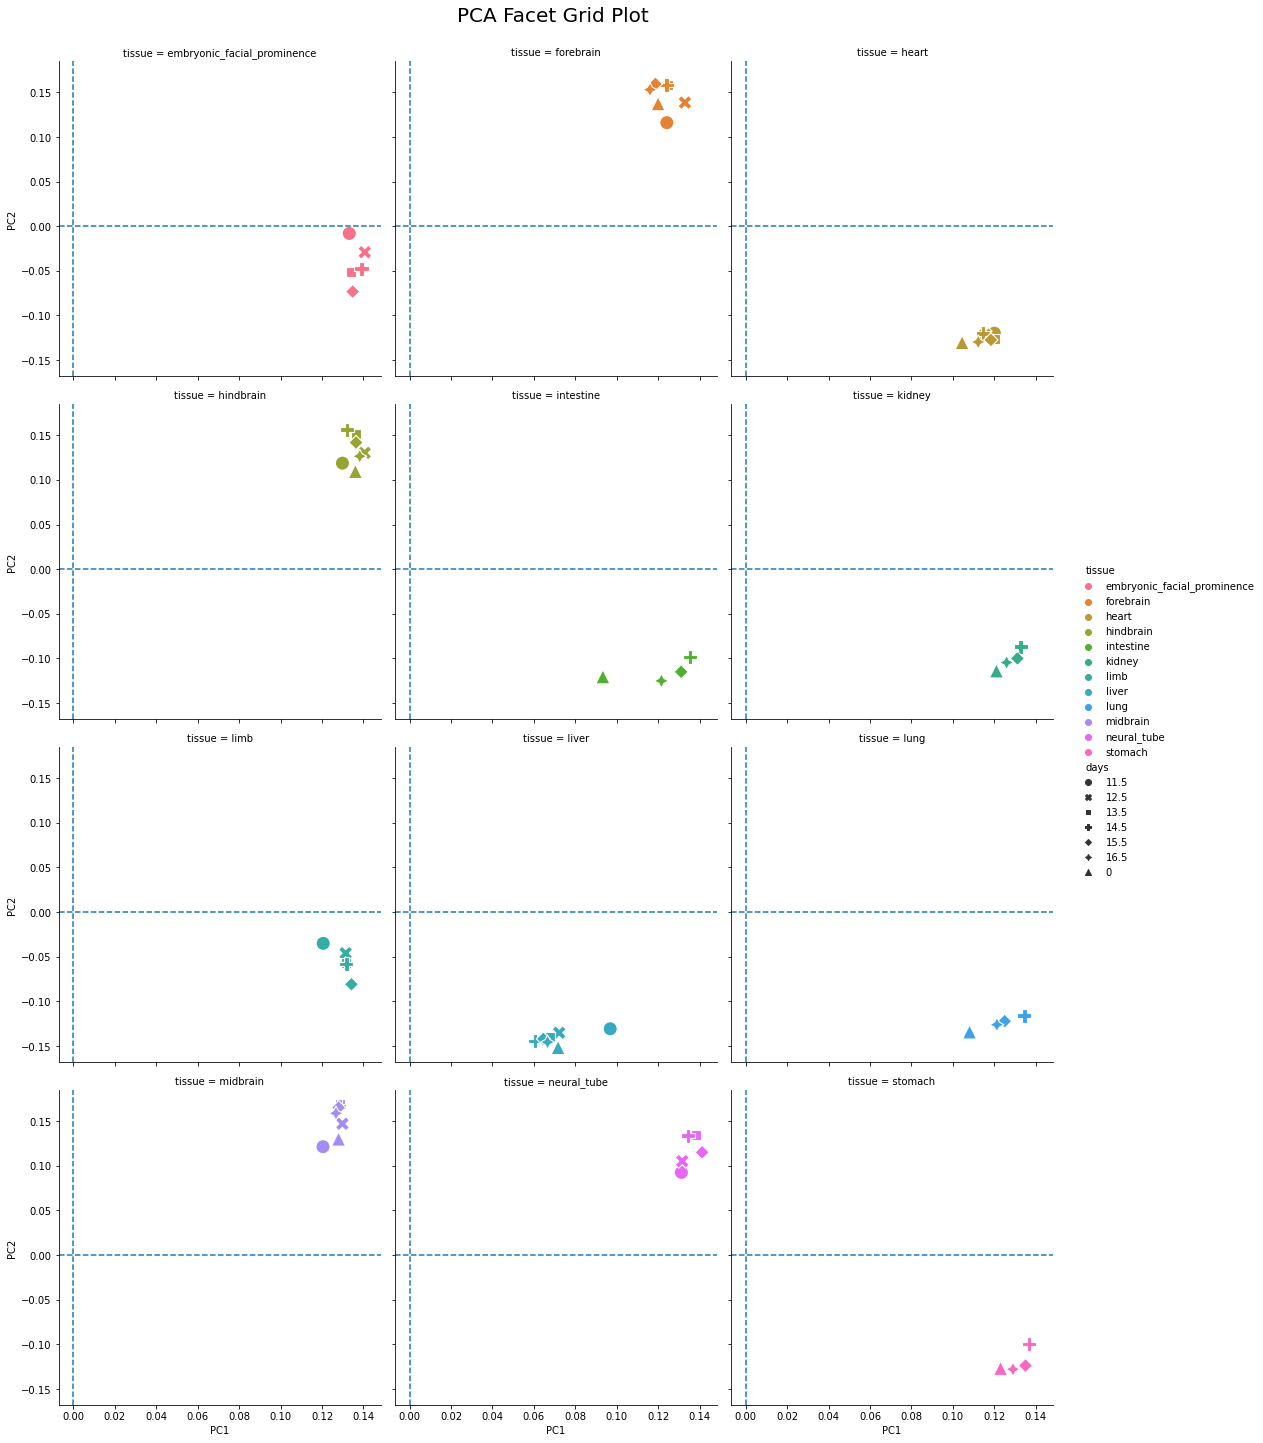

In [81]:
PCA_plot3 = sns.relplot(data=pca_res2, x="PC1", y="PC2", hue="tissue", col="tissue", style="days", col_wrap=3, s=200)
PCA_plot3.fig.suptitle('PCA Facet Grid Plot', y=1, x=.44, fontsize = 20)
PCA_plot3.map(plt.axhline,y=0,linestyle='--')
PCA_plot3.map(plt.axvline,x=0,linestyle='--')

Now that the PCA has been plotted, t-SNE is next!

# t-SNE

t-SNE plots show the relationship between objects based on similarity of probability distributions.

A dataframe only containing the principal components of interest must be constructed as the input for t-SNE.

*** sidenote: Every time the kernel is reset, the t-SNE plot might rotate and/or flip the plot, but the similarities and relation between tissue samples remain the same!

In [25]:
pca_values_3 = pca_res2[['PC1','PC2','PC3']]

In [26]:
from sklearn.manifold import TSNE

# random state is important in order to 'lock in' the plot / not lose the specific t-SNE plot generated.

tsne_app = TSNE(random_state = 213, perplexity = 10, init = 'random',learning_rate='auto')
tsne_res1 = tsne_app.fit_transform(pca_values_3.values)

In [27]:
tsne_data = pd.DataFrame(tsne_res1.tolist(), columns=['tSNE1','tSNE2']) #creating a df with t-SNE outputs

In [28]:
tsne_df = pd.concat([pca_res2, tsne_data], axis=1) #adding the t-SNE data to the overall df

In [29]:
tsne_df

,PC1,PC2,PC3,full_sample_name,tissue,embryo_or_postnatal,days,tSNE1,tSNE2
0,0.133143,-0.008107,-0.077927,C57BL/6_embryonic_facial_prominence_embryo_11....,embryonic_facial_prominence,embryo,11.5,-20.416988,-2.901036
1,0.140654,-0.029207,-0.115974,C57BL/6_embryonic_facial_prominence_embryo_12....,embryonic_facial_prominence,embryo,12.5,-20.138597,-2.016472
2,0.134074,-0.051284,-0.142014,C57BL/6_embryonic_facial_prominence_embryo_13....,embryonic_facial_prominence,embryo,13.5,-19.952063,-0.835412
3,0.139046,-0.047830,-0.142234,C57BL/6_embryonic_facial_prominence_embryo_14....,embryonic_facial_prominence,embryo,14.5,-19.578648,-1.099247
4,0.134803,-0.073337,-0.133369,C57BL/6_embryonic_facial_prominence_embryo_15....,embryonic_facial_prominence,embryo,15.5,-19.281946,-0.297932
...,...,...,...,...,...,...,...,...,...
61,0.141247,0.115110,0.018024,C57BL/6_neural_tube_embryo_15.5_days,neural_tube,embryo,15.5,22.695602,4.763073
62,0.136799,-0.099606,-0.086157,C57BL/6_stomach_embryo_14.5_days,stomach,embryo,14.5,-13.953495,-6.304458
63,0.135055,-0.123839,-0.049768,C57BL/6_stomach_embryo_15.5_days,stomach,embryo,15.5,-10.502662,-7.602132
64,0.129014,-0.127906,-0.059142,C57BL/6_stomach_embryo_16.5_days,stomach,embryo,16.5,-11.244398,-7.459103


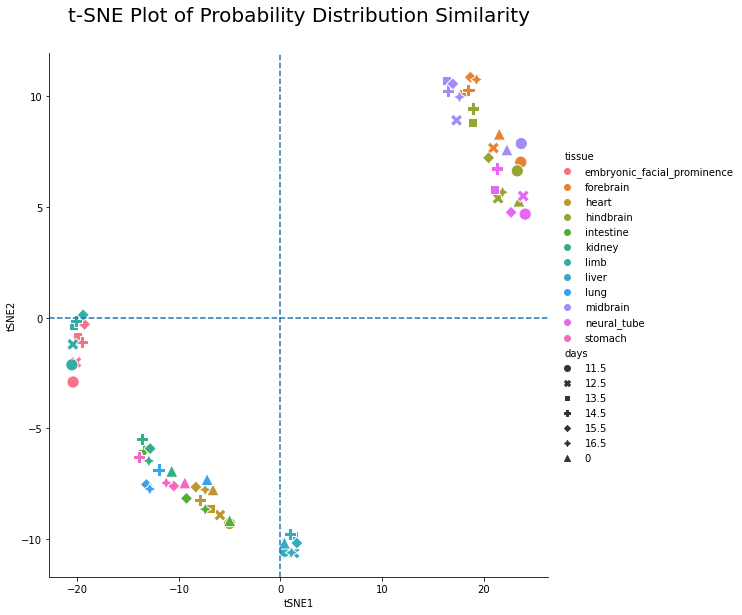

In [79]:
tSNE_plot = sns.relplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='tissue', style='days', height = 8, s=150)

plt.title('t-SNE Plot of Probability Distribution Similarity', y=1.05, fontsize = 20)
plt.axhline(y=0,linestyle='--')
plt.axvline(x=0,linestyle='--')

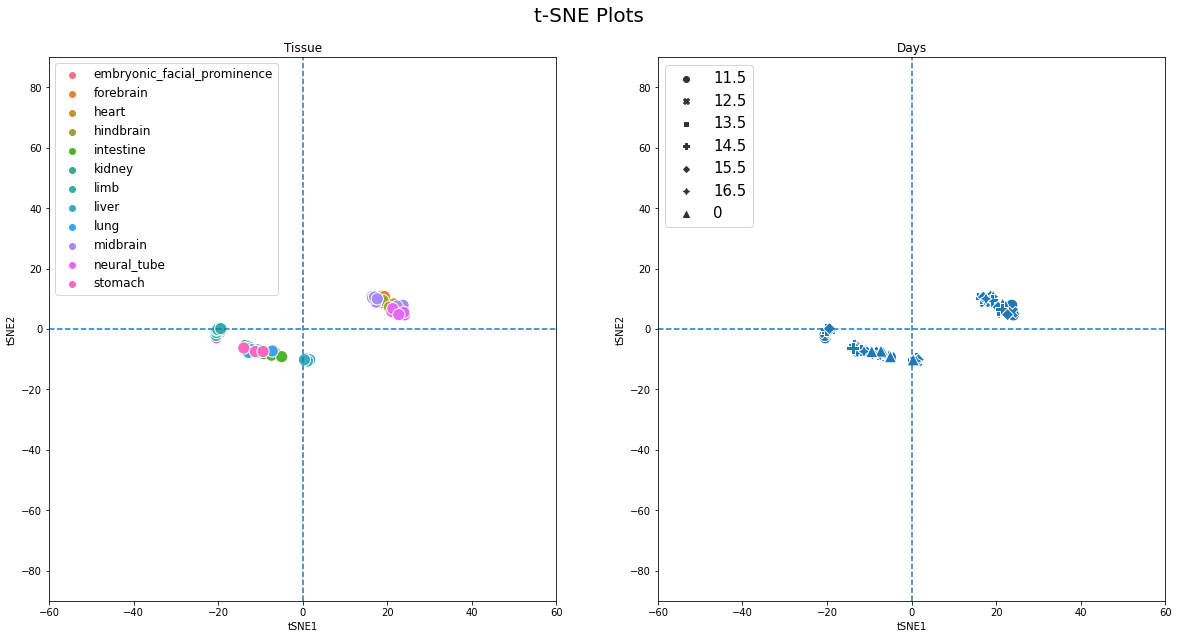

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('t-SNE Plots', y=.95, x=.5, fontsize = 20)

tSNE_plot1 = sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='tissue', s=150, ax = ax1)
tSNE_plot1.legend(fontsize = 12, loc = 'upper left')
tSNE_plot1.set(xlim=(-60,60),ylim=(-90,90))
tSNE_plot1.title.set_text('Tissue')
tSNE_plot1.axhline(y=0,linestyle='--')
tSNE_plot1.axvline(x=0,linestyle='--')

tSNE_plot2 = sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', style='days', s=150, ax = ax2)
tSNE_plot2.legend(fontsize = 15, loc = 'upper left')
tSNE_plot2.set(xlim=(-60,60),ylim=(-90,90))
tSNE_plot2.title.set_text('Days')
tSNE_plot2.axhline(y=0,linestyle='--')
tSNE_plot2.axvline(x=0,linestyle='--')


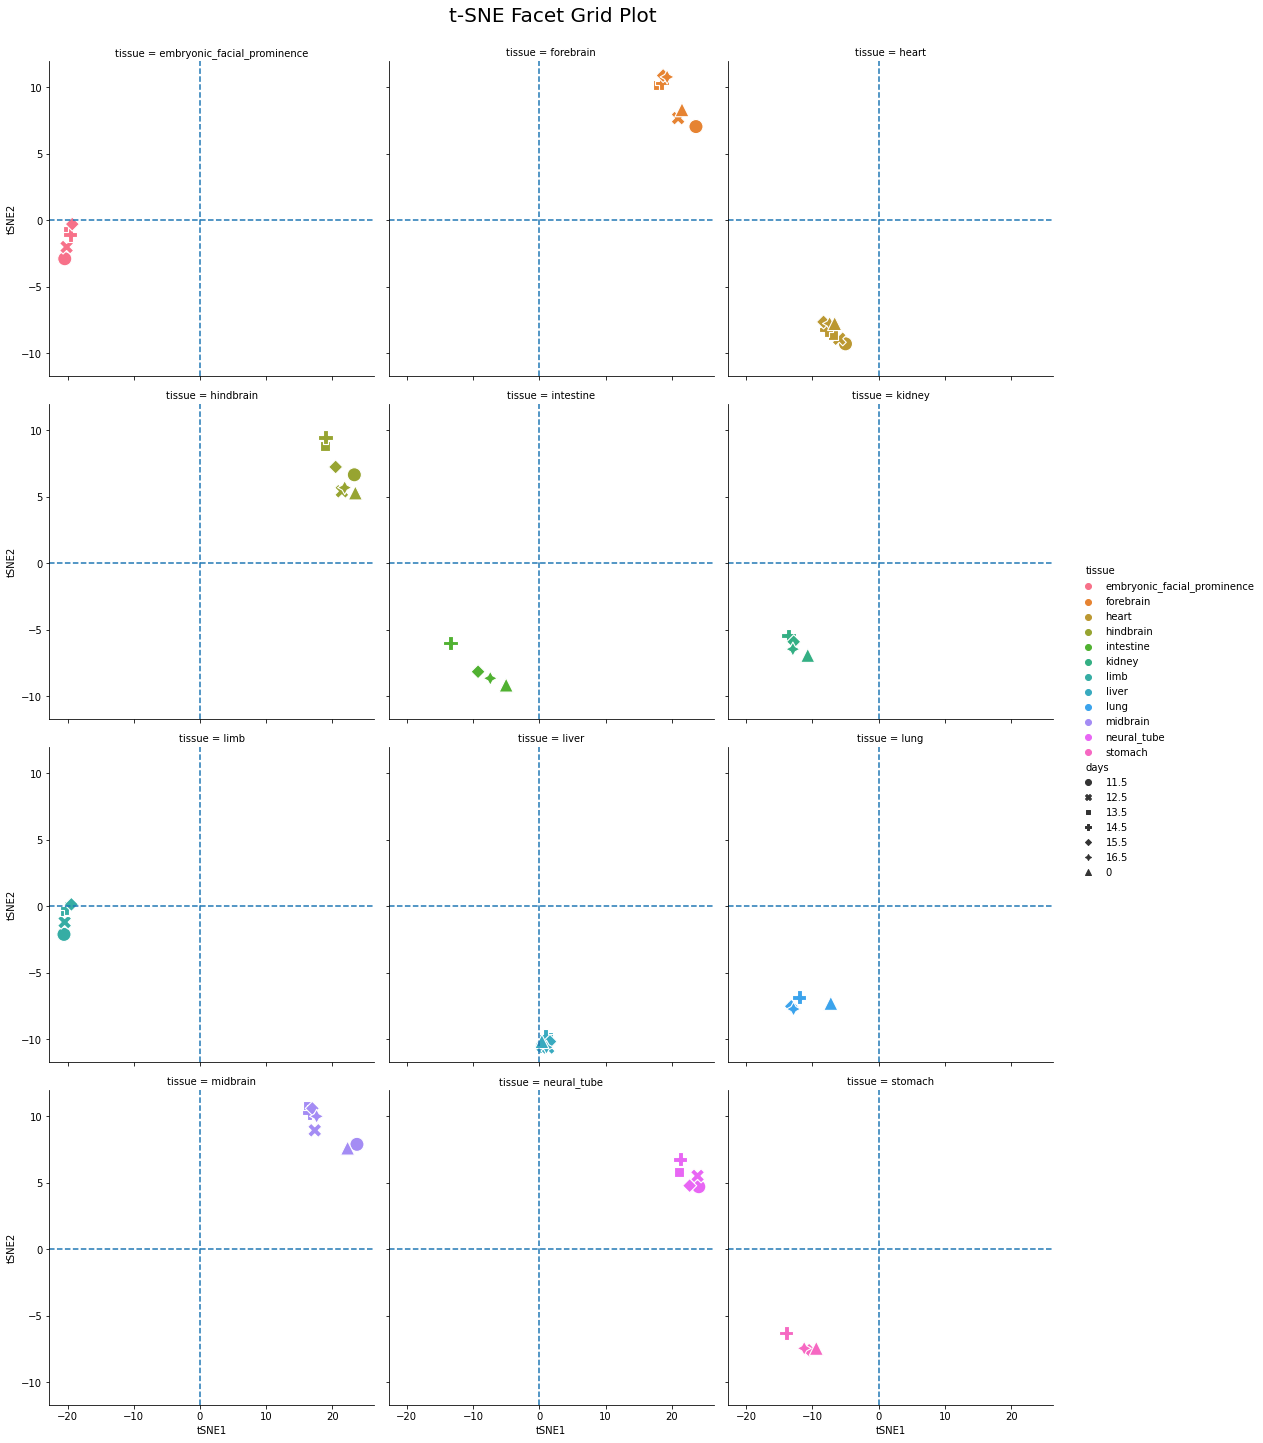

In [76]:
tSNE_plot3 = sns.relplot(data=tsne_df, x="tSNE1", y="tSNE2", hue="tissue", col="tissue", style="days", col_wrap=3, s=200)
tSNE_plot3.fig.suptitle('t-SNE Facet Grid Plot', y=1, x=.44, fontsize = 20)
tSNE_plot3.map(plt.axhline,y=0,linestyle='--')
tSNE_plot3.map(plt.axvline,x=0,linestyle='--')

Finally (last, but not least) UMAP!

# UMAP

A UMAP plot shows how likely two objects are connected / correlated. 

*** sidenote: UMAP requires numpy version 1.21

In [33]:
import umap

reducer = umap.UMAP()

umap_res1 = reducer.fit_transform(pca_values_3)

In [34]:
umap_data = pd.DataFrame(umap_res1.tolist(), columns=['UMAP1','UMAP2']) #creating a df with UMAP outputs

In [35]:
umap_df = pd.concat([tsne_df, umap_data], axis=1) #adding the UMAP data to the overall df

Text(0.5, 1.05, 'UMAP Plot of Variable Correlation')

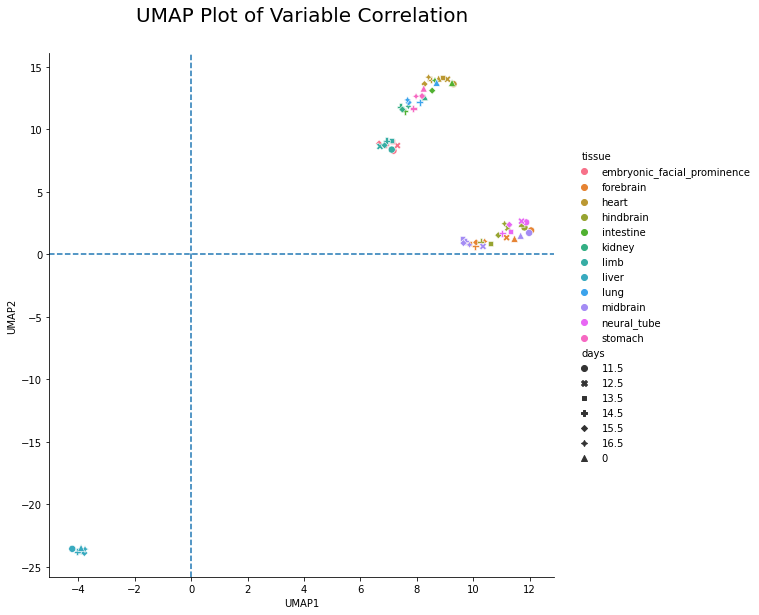

In [78]:
UMAP_plot = sns.relplot(data=umap_df, x='UMAP1', y='UMAP2', hue='tissue', style='days', height = 8, s=50)
UMAP_plot.map(plt.axhline,y=0,linestyle='--')
UMAP_plot.map(plt.axvline,x=0,linestyle='--')

plt.title('UMAP Plot of Variable Correlation', y=1.05, fontsize = 20)

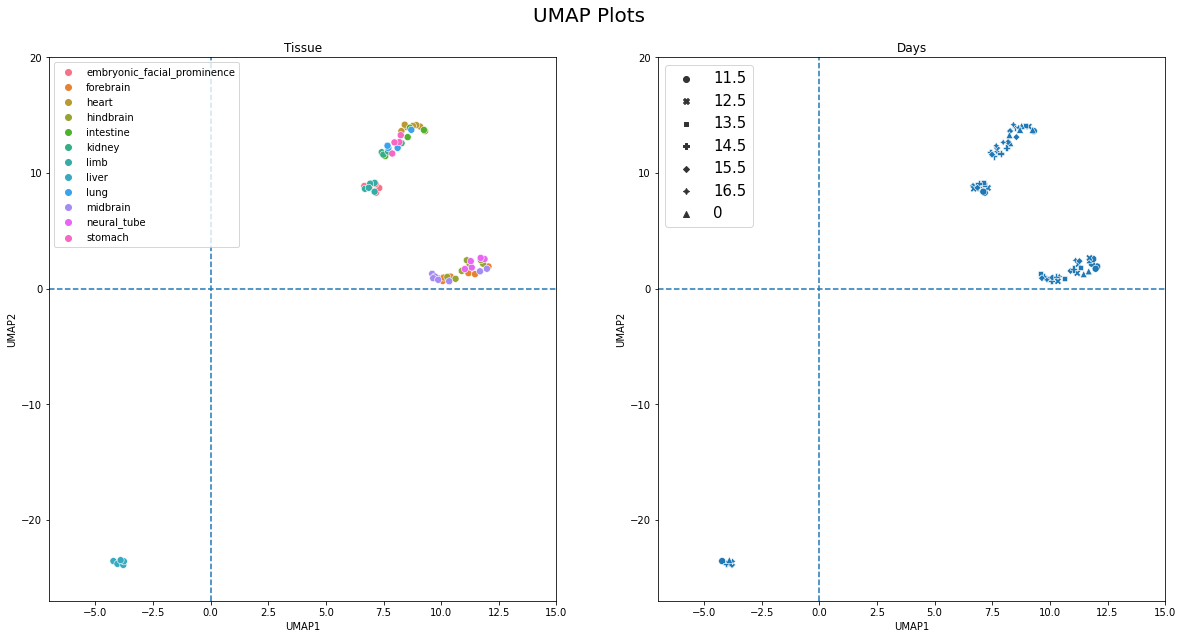

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('UMAP Plots', y=.95, x=.5, fontsize = 20)

UMAP_plot1 = sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='tissue', s=50, ax = ax1)
UMAP_plot1.legend(fontsize = 10, loc = 'upper left')
UMAP_plot1.set(xlim=(-7,15),ylim=(-27,20))
UMAP_plot1.title.set_text('Tissue')
UMAP_plot1.axhline(y=0,linestyle='--')
UMAP_plot1.axvline(x=0,linestyle='--')

UMAP_plot2 = sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', style='days', s=50, ax = ax2)
UMAP_plot2.legend(fontsize = 15, loc = 'upper left')
UMAP_plot2.set(xlim=(-7,15),ylim=(-27,20))
UMAP_plot2.title.set_text('Days')
UMAP_plot2.axhline(y=0,linestyle='--')
UMAP_plot2.axvline(x=0,linestyle='--')

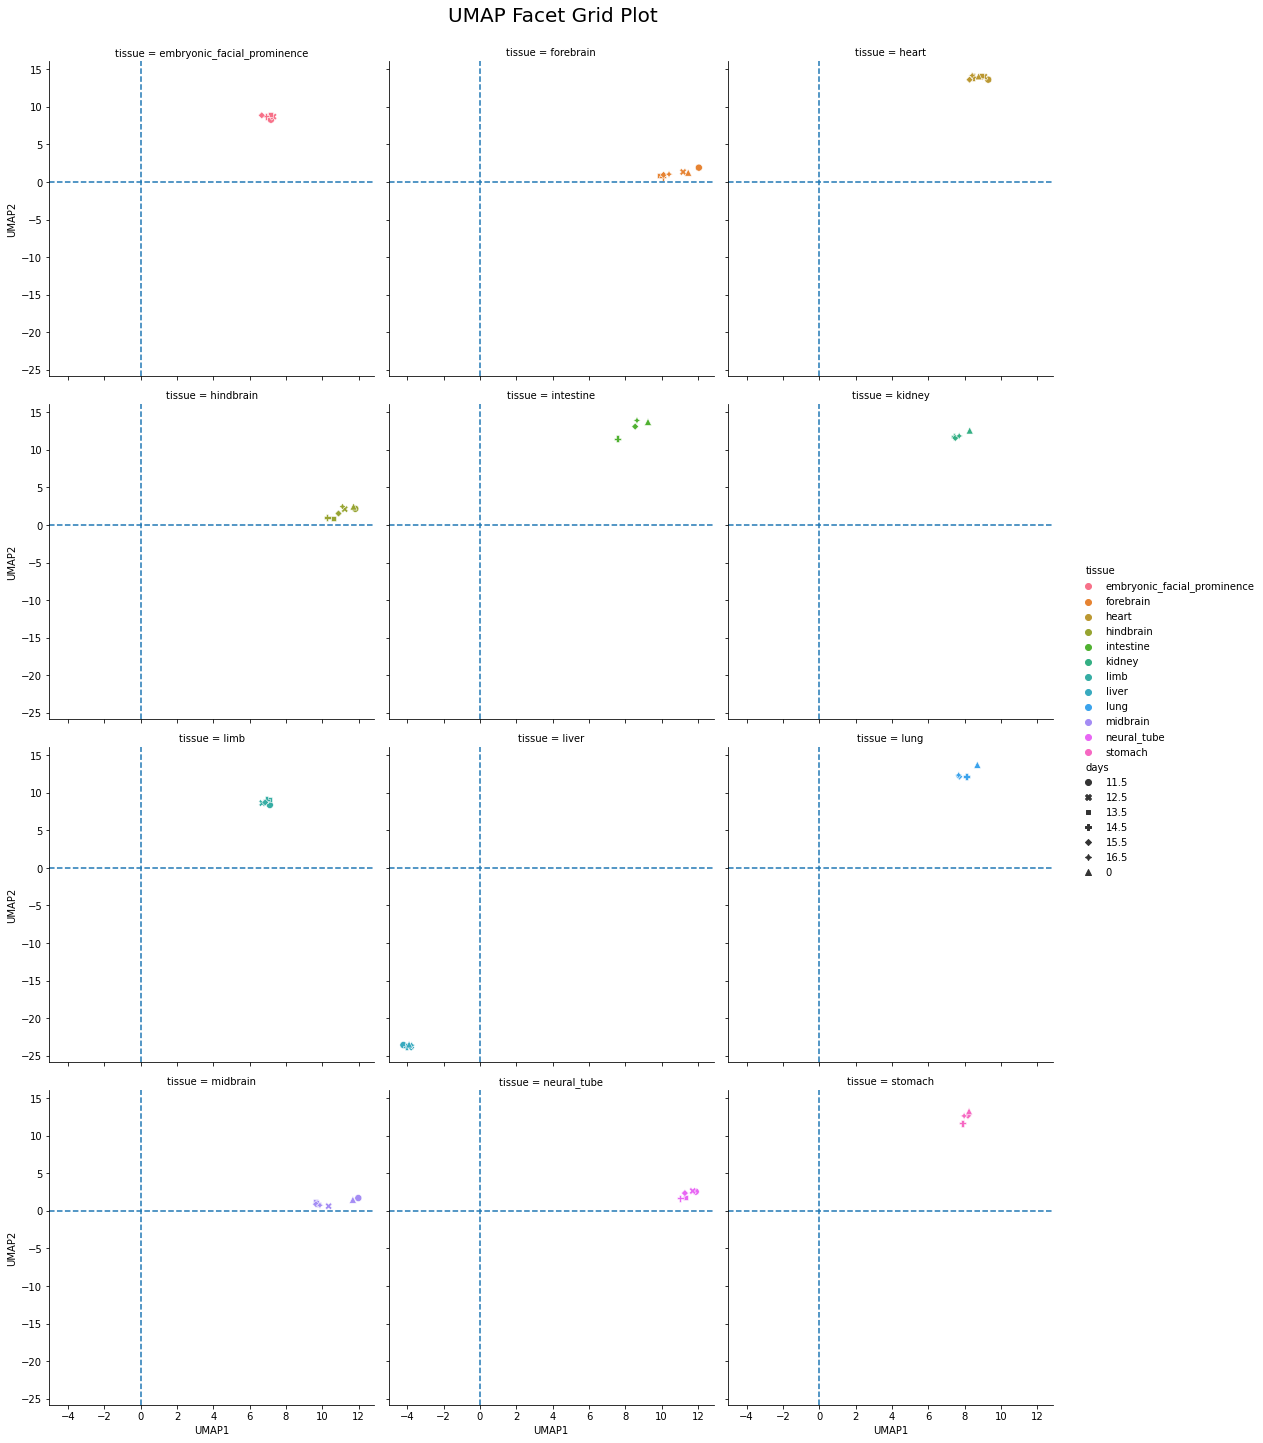

In [84]:
UMAP_plot3 = sns.relplot(data=umap_df, x="UMAP1", y="UMAP2", hue="tissue", col="tissue", style="days", col_wrap=3, s=50)
UMAP_plot3.fig.suptitle('UMAP Facet Grid Plot', y=1, x=.44, fontsize = 20)
UMAP_plot3.map(plt.axhline,y=0,linestyle='--')
UMAP_plot3.map(plt.axvline,x=0,linestyle='--')